In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset CadUnico #1

https://repositorio.seade.gov.br/dataset/objetivo-estrategico-4-assistencia-social

In [2]:
df1 = pd.read_csv("oe04_gini.csv", sep = ";")
df2 = pd.read_csv("oe04_rend_dom_ate_meio_sm.csv", sep = ";")
df3 = pd.read_csv("oe04_fam_situacao_rua.csv", sep = ";")
df4 = pd.read_csv("oe04_rend_cadunico_meio_sm.csv", sep = ";")


Nessa seção, foi feita uma análise inicial dos dados. Foi possivel observar que temos 12 anos de informação em todos datasets, embora esses anos variem de acordo com o dataset (alguns sao de 2012 a 2023, alguns são de 2013 a 2024). Também verificamos que não existem dados nulos neste dataset, e que os dados municipais estão completos, incluindo com todos os anos que falamos que estão inclusos.

##Gini -> Estatal (2012 - 2023)

In [3]:
df1.head()

,ano,cod_ibge,ind_gini
0,2023,35,"0,504"
1,2022,35,"0,5"
2,2021,35,"0,533"
3,2020,35,"0,522"
4,2019,35,"0,526"


In [4]:
df1.shape

(12, 3)

In [5]:
df1.isnull().sum()

ano         0
cod_ibge    0
ind_gini    0
dtype: int64

Esse DataSet possui o indice de Gini para o Estado de São Paulo de 2012 a 2023



##Renda - Domiciliar PerCapita abaixo de 1/2 SM -> Por Região de SP (2012 - 2023)

In [6]:
df2.head()

,ano,regiao_sp,pop_rd_ate_meio_sm,pop_pnadc,perc_rd_ate_meio_sm
0,2023,ESP,7542004,47315515,"15,9"
1,2022,ESP,8594777,46972977,"18,3"
2,2021,ESP,10430493,46623128,"22,4"
3,2020,ESP,8906112,46269533,"19,2"
4,2019,ESP,7744515,45888809,"16,9"


In [7]:
df2.shape

(36, 5)

In [8]:
df2.isnull().sum()

ano                    0
regiao_sp              0
pop_rd_ate_meio_sm     0
pop_pnadc              0
perc_rd_ate_meio_sm    0
dtype: int64

Esse Dataset possui a populacao ate meio salario minimo, por regiao de sao paulo, de 2012 a 2023

##Famílias em Situação de Rua -> Municipal (2013 - 2024)

In [9]:
df3.head()

,ano,cod_ibge,n_fam_rua
0,2024,35,135257
1,2023,35,103083
2,2022,35,80551
3,2021,35,62553
4,2020,35,61333


In [10]:
df3.cod_ibge.unique()

array([     35, 3500105, 3500204, 3500303, 3500402, 3500501, 3500550,
       3500600, 3500709, 3500758, 3500808, 3500907, 3501004, 3501103,
       3501152, 3501202, 3501301, 3501400, 3501509, 3501608, 3501707,
       3501806, 3501905, 3502002, 3502101, 3502200, 3502309, 3502408,
       3502507, 3502606, 3502705, 3502754, 3502804, 3502903, 3503000,
       3503109, 3503158, 3503208, 3503307, 3503356, 3503406, 3503505,
       3503604, 3503703, 3503802, 3503901, 3503950, 3504008, 3504107,
       3504206, 3504305, 3504404, 3504503, 3504602, 3504701, 3504800,
       3504909, 3505005, 3505104, 3505203, 3505302, 3505351, 3505401,
       3505500, 3505609, 3505708, 3505807, 3505906, 3506003, 3506102,
       3506201, 3506300, 3506359, 3506409, 3506508, 3506607, 3506706,
       3506805, 3506904, 3507001, 3507100, 3507159, 3507209, 3507308,
       3507407, 3507456, 3507506, 3507605, 3507704, 3507753, 3507803,
       3507902, 3508009, 3508108, 3508207, 3508306, 3508405, 3508504,
       3508603, 3508

In [11]:
df3.shape

(7752, 3)

In [12]:
# Create df3_restrito by filtering df3 for the specified years
df3_restrito = df3[(df3['ano'] == 2013) | (df3['ano'] == 2014) | (df3['ano'] == 2015) | (df3['ano'] == 2016) | (df3['ano'] == 2017) | (df3['ano'] == 2018) | (df3['ano'] == 2019) | (df3['ano'] == 2020)].copy()

# Display the shape of df3_restrito
display(df3_restrito.shape)

(5168, 3)

In [13]:
# Número de Códigos IBGE
num_unique_ibge_df3 = df3['cod_ibge'].nunique()
print(f"Number of unique IBGE codes in df3: {num_unique_ibge_df3}")

Number of unique IBGE codes in df3: 646


In [14]:
# Define the expected range of years
expected_years_range = set(range(2013, 2025)) # Range is exclusive at the end, so 2025 for 2013-2024

# Group by cod_ibge and get the unique years for each group
years_by_ibge = df3.groupby('cod_ibge')['ano'].unique()

# Check if the set of years for each IBGE code matches the expected range
all_years_match = (years_by_ibge.apply(lambda x: set(x) == expected_years_range)).all()

if all_years_match:
    print("All unique IBGE codes in df3 have data for the years 2013 to 2024.")
else:
    print("Not all unique IBGE codes in df3 have data for the years 2013 to 2024.")
    # Optionally, show which codes do not have the expected years
    codes_with_different_years = years_by_ibge[years_by_ibge.apply(lambda x: set(x) != expected_years_range)]
    print("\nIBGE codes with years outside the 2013-2024 range:")
    display(codes_with_different_years)

All unique IBGE codes in df3 have data for the years 2013 to 2024.


In [15]:
df3.isnull().sum()

ano          0
cod_ibge     0
n_fam_rua    0
dtype: int64

In [16]:
df3_restrito.query('cod_ibge != 35')

,ano,cod_ibge,n_fam_rua
2592,2020,3500105,5
2593,2020,3500204,2
2594,2020,3500303,3
2595,2020,3500402,3
2596,2020,3500501,4
...,...,...,...
7747,2013,3557006,5
7748,2013,3557105,0
7749,2013,3557154,0
7750,2013,3557204,0


##Renda - Domiciliar PerCapita abaixo de 1/2 SM -> Municipal (2013 - 2024)



In [17]:
df4.head()

,ano,cod_ibge,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm
0,2024,35,9329191,14061964,"66,3"
1,2023,35,10068823,14831766,"67,9"
2,2022,35,11326070,13910888,"81,4"
3,2021,35,9596213,11893122,"80,7"
4,2020,35,8524275,10685553,"79,8"


In [18]:
df4.shape

(7752, 5)

In [19]:
# Número de Códigos IBGE
num_unique_ibge_df4 = df4['cod_ibge'].nunique()
print(f"Number of unique IBGE codes in df3: {num_unique_ibge_df4}")

Number of unique IBGE codes in df3: 646


In [20]:
# Define the expected range of years
expected_years_range = set(range(2013, 2025)) # Range is exclusive at the end, so 2025 for 2013-2024

# Group by cod_ibge and get the unique years for each group
years_by_ibge = df4.groupby('cod_ibge')['ano'].unique()

# Check if the set of years for each IBGE code matches the expected range
all_years_match = (years_by_ibge.apply(lambda x: set(x) == expected_years_range)).all()

if all_years_match:
    print("All unique IBGE codes in df3 have data for the years 2013 to 2024.")
else:
    print("Not all unique IBGE codes in df3 have data for the years 2013 to 2024.")
    # Optionally, show which codes do not have the expected years
    codes_with_different_years = years_by_ibge[years_by_ibge.apply(lambda x: set(x) != expected_years_range)]
    print("\nIBGE codes with years outside the 2013-2024 range:")
    display(codes_with_different_years)

All unique IBGE codes in df3 have data for the years 2013 to 2024.


In [21]:
# Create df3_restrito by filtering df3 for the specified years
df4_restrito = df4[(df4['ano'] == 2013) | (df4['ano'] == 2014) | (df4['ano'] == 2015) | (df4['ano'] == 2016) | (df4['ano'] == 2017) | (df4['ano'] == 2018) | (df4['ano'] == 2019) | (df4['ano'] == 2020)].copy()

# Display the shape of df3_restrito
display(df4_restrito.shape)

(5168, 5)

In [22]:
df3.isnull().sum()

ano          0
cod_ibge     0
n_fam_rua    0
dtype: int64

In [23]:
df4_restrito

,ano,cod_ibge,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm
4,2020,35,8524275,10685553,"79,8"
5,2019,35,8455169,10859041,"77,9"
6,2018,35,8263861,10309786,"80,2"
7,2017,35,8839373,10536889,"83,9"
8,2016,35,8543383,10460801,"81,7"
...,...,...,...,...,...
7747,2013,3557006,21894,23221,"94,3"
7748,2013,3557105,24078,32482,"74,1"
7749,2013,3557154,552,687,"80,3"
7750,2013,3557204,4379,4943,"88,6"


In [24]:
df4_restrito.query('cod_ibge != 35')

,ano,cod_ibge,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm
2592,2020,3500105,3132,5109,"61,3"
2593,2020,3500204,1183,1749,"67,6"
2594,2020,3500303,8013,9548,"83,9"
2595,2020,3500402,1331,2019,"65,9"
2596,2020,3500501,2386,3207,"74,4"
...,...,...,...,...,...
7747,2013,3557006,21894,23221,"94,3"
7748,2013,3557105,24078,32482,"74,1"
7749,2013,3557154,552,687,"80,3"
7750,2013,3557204,4379,4943,"88,6"


#Dataset CadÚnico #2 (2018+)

https://repositorio.seade.gov.br/dataset/transferencia-de-renda-painel

In [25]:
df5 = pd.read_csv("bd_cad_pbf.csv", sep = ";", encoding='latin-1')
df6 = pd.read_csv("br_sp_var.csv", sep = ";", encoding='latin-1')
df7 = pd.read_csv("bd_bpc.csv", sep = ";", encoding='latin-1')
df8 = pd.read_csv("uf.csv", sep = ";", encoding='latin-1')

C:\Users\gusta\AppData\Local\Temp\ipykernel_44428\1435830325.py:1: DtypeWarning: Columns (5,6,8,9,13,15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv("bd_cad_pbf.csv", sep = ";", encoding='latin-1')


In [26]:
df5dic = pd.read_csv("bd_cad_pbf_dicionario.csv", sep = ";", encoding='latin-1')
df6dic = pd.read_csv("br_sp_var_dicionario.csv", sep = ";", encoding='latin-1')
df7dic = pd.read_csv("bd_bpc_dicionario.csv", sep = ";", encoding='latin-1')
df8dic = pd.read_csv("uf_dicionario.csv", sep = ";", encoding='latin-1')

##Cadastro Único - Programa Bolsa Família (PBF) - ESP

In [27]:
df5.head()

,Cod_Mun,Mun,RA,Referência,Pes_PBF,Pes_Cad,Fam_Cad,Fam_PBF,Domic_20,Pop_20,...,MapSeq,F_PBF_EP,F_CAD_EP,Pes_Aux,Fam_Aux,Fam_PBF_Aux,Fam_PBF_2,F_Aux_Domi,Map_Aux,MapSeq_Aux
0,3500105,Adamantina,RA de Presidente Prudente,jan/18,1012.0,5306,1871,291.0,12328,33894,...,4,72,85.0,1012,NaN,291.0,NaN,NaN,NaN,NaN
1,3500204,Adolfo,RA de São José do Rio Preto,jan/18,552.0,1559,581,175.0,1280,3447,...,3,124,148.0,552,NaN,175.0,NaN,NaN,NaN,NaN
2,3500303,Aguaí,RA de Campinas,jan/18,5074.0,12637,4213,1402.0,12063,35608,...,3,680,809.0,5074,NaN,1402.0,NaN,NaN,NaN,NaN
3,3500402,Águas da Prata,RA de Campinas,jan/18,577.0,1749,542,144.0,2780,7797,...,4,85,104.0,577,NaN,144.0,NaN,NaN,NaN,NaN
4,3500501,Águas de Lindóia,RA de Campinas,jan/18,953.0,2510,868,297.0,6305,18374,...,4,148,186.0,953,NaN,297.0,NaN,NaN,NaN,NaN


In [28]:
df5.shape


(57405, 22)

In [29]:
df5dic


,Variáveis,Nome,Fonte
0,Cod_Mun,Códido do Município,IBGE
1,Mun,Nome do Município,IBGE
2,RA,Nome da Região Administrativa,Fundação Seade.
3,Referência,Data (mês e ano),Ministério do Desenvolvimento e Assistência So...
4,Pes_PBF,Número de pessoas beneficiárias do Programa Bo...,Ministério do Desenvolvimento e Assistência So...
5,Pes_Cad,Número de pessoas inscritas no CadÚnico,Ministério do Desenvolvimento e Assistência So...
6,Fam_Cad,Número de famílias incritas no CadÚnico,Ministério do Desenvolvimento e Assistência So...
7,Fam_PBF,Número de famílias beneficiárias do PBF,Ministério do Desenvolvimento e Assistência So...
8,Domic_20,Número de domicílios,Fundação Seade. Estimativas Populacionais. IBG...
9,Pop_20,Número de pessoas,Fundação Seade. Estimativas Populacionais. IBG...


In [30]:
num_unique_cod_mun_df5 = df5['Cod_Mun'].nunique()
print(f"Number of unique Cod_Mun in df5: {num_unique_cod_mun_df5}")

Number of unique Cod_Mun in df5: 645


In [31]:
df5[['mes', 'ano']] = df5['Referência'].str.split('/', expand=True)


In [32]:
df5.ano.unique()

array(['18', '19', '20', '21', '22', '23', '24', '25'], dtype=object)

In [33]:
df5[df5['ano'].isin(['18', '19', '20'])]

,Cod_Mun,Mun,RA,Referência,Pes_PBF,Pes_Cad,Fam_Cad,Fam_PBF,Domic_20,Pop_20,...,F_CAD_EP,Pes_Aux,Fam_Aux,Fam_PBF_Aux,Fam_PBF_2,F_Aux_Domi,Map_Aux,MapSeq_Aux,mes,ano
0,3500105,Adamantina,RA de Presidente Prudente,jan/18,1012.0,5306,1871,291.0,12328,33894,...,85.0,1012,NaN,291.0,NaN,NaN,NaN,NaN,jan,18
1,3500204,Adolfo,RA de São José do Rio Preto,jan/18,552.0,1559,581,175.0,1280,3447,...,148.0,552,NaN,175.0,NaN,NaN,NaN,NaN,jan,18
2,3500303,Aguaí,RA de Campinas,jan/18,5074.0,12637,4213,1402.0,12063,35608,...,809.0,5074,NaN,1402.0,NaN,NaN,NaN,NaN,jan,18
3,3500402,Águas da Prata,RA de Campinas,jan/18,577.0,1749,542,144.0,2780,7797,...,104.0,577,NaN,144.0,NaN,NaN,NaN,NaN,jan,18
4,3500501,Águas de Lindóia,RA de Campinas,jan/18,953.0,2510,868,297.0,6305,18374,...,186.0,953,NaN,297.0,NaN,NaN,NaN,NaN,jan,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23215,3557006,Votorantim,RA de Sorocaba,dez/20,10294.0,20361,7163,3412.0,39510,119824,...,3158.0,10294,NaN,3412.0,NaN,NaN,NaN,NaN,dez,20
23216,3557105,Votuporanga,RA de São José do Rio Preto,dez/20,6709.0,20422,8686,2559.0,34514,91760,...,2683.0,6709,NaN,2559.0,NaN,NaN,NaN,NaN,dez,20
23217,3557154,Zacarias,RA de São José do Rio Preto,dez/20,272.0,1207,453,84.0,952,2560,...,49.0,272,NaN,84.0,NaN,NaN,NaN,NaN,dez,20
23218,3557204,Chavantes,RA de Marília,dez/20,2018.0,4012,1442,642.0,4049,12223,...,615.0,2018,NaN,642.0,NaN,NaN,NaN,NaN,dez,20


In [42]:
#df5_restrito = df5[df5['ano' == '18' or 'ano' == '19' or 'ano' == '20']]
df5_restrito = df5[(df5['ano'] == '18') | (df5['ano'] == '19') | (df5['ano'] == '20')].copy()

In [43]:
df5_restrito.shape

(23220, 24)

In [44]:
df5_restrito.isnull().sum()

Cod_Mun            0
Mun                0
RA                 0
Referência         0
Pes_PBF            0
Pes_Cad            0
Fam_Cad            0
Fam_PBF            0
Domic_20           0
Pop_20             0
F_PBF_Domi         0
Map                0
MapSeq             0
F_PBF_EP           0
F_CAD_EP           0
Pes_Aux            0
Fam_Aux        23220
Fam_PBF_Aux        0
Fam_PBF_2      23220
F_Aux_Domi     23220
Map_Aux        23220
MapSeq_Aux     23220
mes                0
ano                0
dtype: int64

In [45]:
 df5.isnull().sum()


Cod_Mun            0
Mun                0
RA                 0
Referência         0
Pes_PBF        27735
Pes_Cad            0
Fam_Cad            0
Fam_PBF        27735
Domic_20           0
Pop_20             0
F_PBF_Domi         0
Map                0
MapSeq             0
F_PBF_EP        1290
F_CAD_EP           5
Pes_Aux            0
Fam_Aux        47085
Fam_PBF_Aux        0
Fam_PBF_2      39990
F_Aux_Domi     39345
Map_Aux        39345
MapSeq_Aux     39345
mes                0
ano                0
dtype: int64

##Cadastro Único - Programa Bolsa Família - Brasil e ESP

In [46]:
df6.head()

,Anomes,BR_CAD_F,BR_PBF_F,BR_PBF_FV,SP_CAD_F,SP_PBF_F,SP_PBF_FV,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2018-01,23.426.757,12.436.457,NaN,3.868.154,1.564.882,NaN,NaN,NaN,NaN
1,2018-02,23.651.349,12.497.668,"0,5",3.915.457,1.583.160,"1,2",NaN,NaN,NaN
2,2018-03,22.913.242,12.564.170,"0,5",3.785.046,1.600.868,"1,1",NaN,NaN,NaN
3,2018-04,23.195.047,12.249.285,"-2,5",3.842.336,1.523.619,"-4,8",NaN,NaN,NaN
4,2018-05,23.547.867,12.380.654,"1,1",3.917.587,1.538.775,"1,0",NaN,NaN,NaN


In [47]:
df6dic

,Variáveis,Nome,Fonte,Nota
0,Anomes,Data (mês e ano),Ministério do Desenvolvimento e Assistência So...,NaN
1,BR_CAD_F,Número de famílias inscritas no CadÚnico (Bras...,Ministério do Desenvolvimento e Assistência So...,NaN
2,BR_PBF_F,Número de famílias beneficiárias do PBF (Brasi...,Ministério do Desenvolvimento e Assistência So...,O Programa Bolsa Família - PBF esteve vigente ...
3,NaN,NaN,NaN,NaN
4,BR_PBF_FV,Variação percentual do número de famílias bene...,Fundação Seade.,NaN
5,SP_CAD_F,Número de famílias inscritas no CadÚnico (Esta...,Ministério do Desenvolvimento e Assistência So...,NaN
6,SP_PBF_F,Número de famílias beneficiárias do PBF (Estad...,Ministério do Desenvolvimento e Assistência So...,O Programa Bolsa Família - PBF esteve vigente ...
7,NaN,NaN,NaN,NaN
8,SP_PBF_FV,Variação percentual do número de famílias bene...,Fundação Seade.,NaN


In [48]:
df6[['Ano', 'Mes']] = df6['Anomes'].str.split('-', expand=True)
display(df6.head())

,Anomes,BR_CAD_F,BR_PBF_F,BR_PBF_FV,SP_CAD_F,SP_PBF_F,SP_PBF_FV,Unnamed: 7,Unnamed: 8,Unnamed: 9,Ano,Mes
0,2018-01,23.426.757,12.436.457,NaN,3.868.154,1.564.882,NaN,NaN,NaN,NaN,2018,01
1,2018-02,23.651.349,12.497.668,"0,5",3.915.457,1.583.160,"1,2",NaN,NaN,NaN,2018,02
2,2018-03,22.913.242,12.564.170,"0,5",3.785.046,1.600.868,"1,1",NaN,NaN,NaN,2018,03
3,2018-04,23.195.047,12.249.285,"-2,5",3.842.336,1.523.619,"-4,8",NaN,NaN,NaN,2018,04
4,2018-05,23.547.867,12.380.654,"1,1",3.917.587,1.538.775,"1,0",NaN,NaN,NaN,2018,05


In [49]:
for i in range(7, 10):
    col_name = df6.columns[i]
    is_all_nan = df6[col_name].isnull().all()
    print(f"Column '{col_name}' (index {i}) is all NaN: {is_all_nan}")

Column 'Unnamed: 7' (index 7) is all NaN: True
Column 'Unnamed: 8' (index 8) is all NaN: True
Column 'Unnamed: 9' (index 9) is all NaN: True


In [50]:
colunas_nulas = ['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']
df6.drop(colunas_nulas, axis=1, inplace=True)
df6.drop('Anomes', axis =1, inplace = True)

In [51]:
df6.shape

(96, 8)

In [52]:
meses_por_ano = df6.groupby('Ano')['Mes'].nunique()
meses_por_ano

Ano
2018    12
2019    12
2020    12
2021    12
2022    12
2023    12
2024    12
2025     5
Name: Mes, dtype: int64

Se o shape é (96,7), eu estou esperando 96 instâncias, entretanto, acima só existem 89. Vou tentar descobrir abaico onde estão as restantes.

In [53]:
colunas_sem_ano = df6[df6['Ano'].isnull()]
display(colunas_sem_ano)


,BR_CAD_F,BR_PBF_F,BR_PBF_FV,SP_CAD_F,SP_PBF_F,SP_PBF_FV,Ano,Mes
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Faz sentido que elas estejam aqui para um dia serem preenchidas com os demais dados de 2025? Sim. Faz sentidos que elas estejam aqui para esse projeto? Não mesmo.

In [54]:
df6.dropna(how='all', inplace=True)
display(df6.shape)

(89, 8)

In [55]:
df6[df6.isnull().any(axis=1)]


,BR_CAD_F,BR_PBF_F,BR_PBF_FV,SP_CAD_F,SP_PBF_F,SP_PBF_FV,Ano,Mes
0,23.426.757,12.436.457,NaN,3.868.154,1.564.882,NaN,2018,01


Essa linha com NaN é porque o cálculo da variação percentual ao perido anterior, e aqui nao há informação referente a esse período.

##Benefício de Prestação Continuada (BPC) - ESP

In [56]:
df7.head()

,Cod_Mun,Mun,RA,Referência,PCD_BPC,Ido_BPC,Bem_BPC,Pop_65_mais,Pop_2020,Ido_BPC_Idoso65%,BPC_Pop%,Map,MapSeq,65_menos_Idoso_BPC,Unnamed: 14
0,3500105,Adamantina,RA de Presidente Prudente,jan/18,384.0,206.0,590,5282,33894,"3,9","1,7","1 a 1,9",3,5076.0,NaN
1,3500204,Adolfo,RA de São José do Rio Preto,jan/18,21.0,19.0,40,521,3447,"3,6","1,2","1 a 1,9",3,502.0,NaN
2,3500303,Aguaí,RA de Campinas,jan/18,337.0,184.0,521,3527,35608,"5,2","1,5","1 a 1,9",3,3343.0,NaN
3,3500402,Águas Da Prata,RA de Campinas,jan/18,47.0,79.0,126,1236,7797,"6,4","1,6","1 a 1,9",3,1157.0,NaN
4,3500501,Águas De Lindóia,RA de Campinas,jan/18,161.0,129.0,290,2301,18374,"5,6","1,6","1 a 1,9",3,2172.0,NaN


In [57]:
df7dic

,Variáveis,Nome,Fonte
0,Cod_Mun,Códido do Município,IBGE
1,Mun,Nome do Município,IBGE
2,RA,Nome da Região Administrativa,Fundação Seade.
3,Referência,Data (mês e ano),Ministério do Desenvolvimento e Assistência So...
4,PCD_BPC,Número de pessoas com decifiência beneficiária...,Ministério do Desenvolvimento e Assistência So...
5,Ido_BPC,Número de pessoas idosas beneficiárias do BPC,Ministério do Desenvolvimento e Assistência So...
6,Bem_BPC,Número de pessoas beneficiárias do BPC,Ministério do Desenvolvimento e Assistência So...
7,Pop_65_mais,Número de pessoas com 65 anos ou mais,Fundação Seade. Estimativas Populacionais.
8,Pop_2021,Número de pessoas,Fundação Seade. Estimativas Populacionais.
9,Ido_BPC_Idoso65%,Participação de pessoas idosas beneficiárias d...,Fundação Seade.


In [58]:
print(df7.iloc[:, -1].isnull().all())


True


In [59]:

if df7.iloc[:, -1].isnull().all():
    # Drop the last column
    df7.drop(df7.columns[-1], axis=1, inplace=True)
    print("Dropada.")
else:
    print("Existiam valores. Mais análise é necessária.")

# Display the shape to confirm
print("Shape")
display(df7.shape)

Dropada.
Shape


(57405, 14)

In [60]:
df7[['mes', 'ano']] = df7['Referência'].str.split('/', expand=True)


In [61]:
df7['Mun'] = df7['Mun'].str.title()
display(df7[['Cod_Mun', 'Mun']].head())

,Cod_Mun,Mun
0,3500105,Adamantina
1,3500204,Adolfo
2,3500303,Aguaí
3,3500402,Águas Da Prata
4,3500501,Águas De Lindóia


In [62]:
df7[df7.isnull().any(axis=1)]


,Cod_Mun,Mun,RA,Referência,PCD_BPC,Ido_BPC,Bem_BPC,Pop_65_mais,Pop_2020,Ido_BPC_Idoso65%,BPC_Pop%,Map,MapSeq,65_menos_Idoso_BPC,mes,ano
51036,3507209,Borá,RA de Marília,ago/24,NaN,NaN,NaN,93,810,NaN,NaN,NaN,NaN,NaN,ago,24
51057,3509106,Caiuá,RA de Presidente Prudente,ago/24,NaN,NaN,NaN,760,5729,NaN,NaN,NaN,NaN,NaN,ago,24
51424,3541802,Queiroz,RA de Marília,ago/24,NaN,NaN,NaN,308,3400,NaN,NaN,NaN,NaN,NaN,ago,24
51433,3542701,Restinga,RA de Franca,ago/24,NaN,NaN,NaN,702,7740,"0,00",NaN,NaN,NaN,702.0,ago,24
51444,3543600,Rifaina,RA de Franca,ago/24,NaN,NaN,NaN,509,3474,NaN,NaN,NaN,NaN,NaN,ago,24
51579,3555703,União Paulista,RA de São José do Rio Preto,ago/24,NaN,NaN,NaN,215,1775,NaN,NaN,NaN,NaN,NaN,ago,24


In [37]:
df7

,Cod_Mun,Mun,RA,Referência,PCD_BPC,Ido_BPC,Bem_BPC,Pop_65_mais,Pop_2020,Ido_BPC_Idoso65%,BPC_Pop%,Map,MapSeq,65_menos_Idoso_BPC,Unnamed: 14
0,3500105,Adamantina,RA de Presidente Prudente,jan/18,384.0,206.0,590,5282,33894,"3,9","1,7","1 a 1,9",3,5076.0,NaN
1,3500204,Adolfo,RA de São José do Rio Preto,jan/18,21.0,19.0,40,521,3447,"3,6","1,2","1 a 1,9",3,502.0,NaN
2,3500303,Aguaí,RA de Campinas,jan/18,337.0,184.0,521,3527,35608,"5,2","1,5","1 a 1,9",3,3343.0,NaN
3,3500402,Águas Da Prata,RA de Campinas,jan/18,47.0,79.0,126,1236,7797,"6,4","1,6","1 a 1,9",3,1157.0,NaN
4,3500501,Águas De Lindóia,RA de Campinas,jan/18,161.0,129.0,290,2301,18374,"5,6","1,6","1 a 1,9",3,2172.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57400,3557006,Votorantim,RA de Sorocaba,mai/25,825.0,809.0,1634,12340,122356,"6,56","1,34","1 a 1,9",3,11531.0,NaN
57401,3557105,Votuporanga,RA de São José do Rio Preto,mai/25,1679.0,1151.0,2830,13230,93066,"8,70","3,04",3 e mais,1,12079.0,NaN
57402,3557154,Zacarias,RA de São José do Rio Preto,mai/25,19.0,5.0,24,373,2602,"1,34","0,92","0 a 0,9",4,368.0,NaN
57403,3557204,Chavantes,RA de Marília,mai/25,186.0,111.0,297,1591,12241,"6,98","2,43","2 a 2,9",2,1480.0,NaN


In [63]:
# Create df7_restrito by filtering df7 for years '20', '19', or '18'
df7_restrito = df7[(df7['ano'] == '20') | (df7['ano'] == '19') | (df7['ano'] == '18')].copy()

# Display the shape of df7_restrito
display(df7_restrito.shape)

(23220, 16)

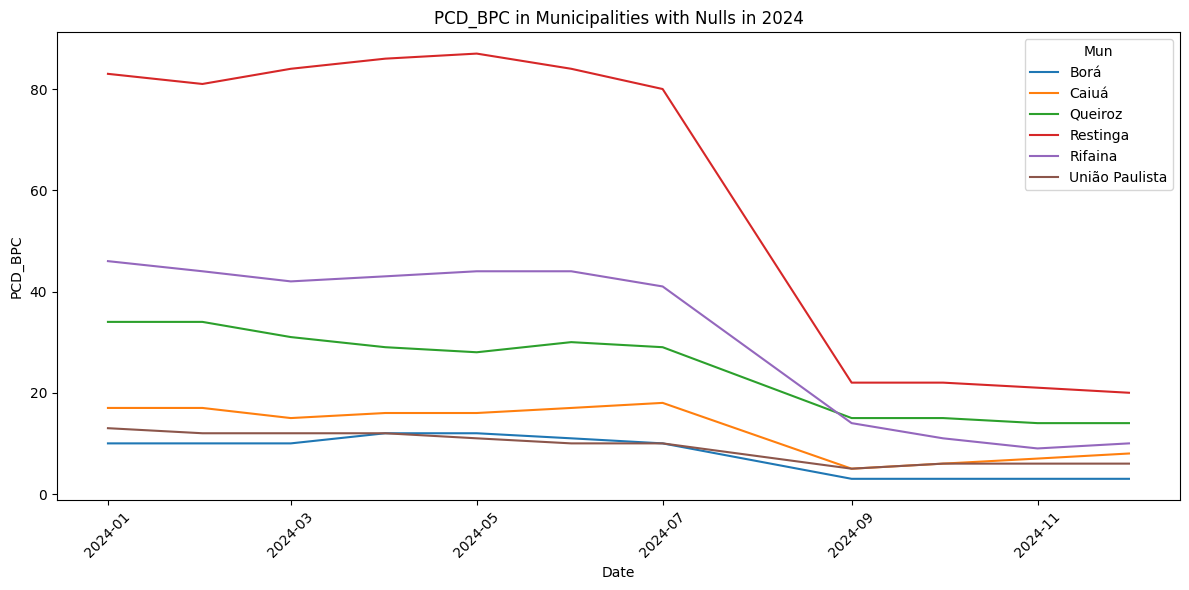

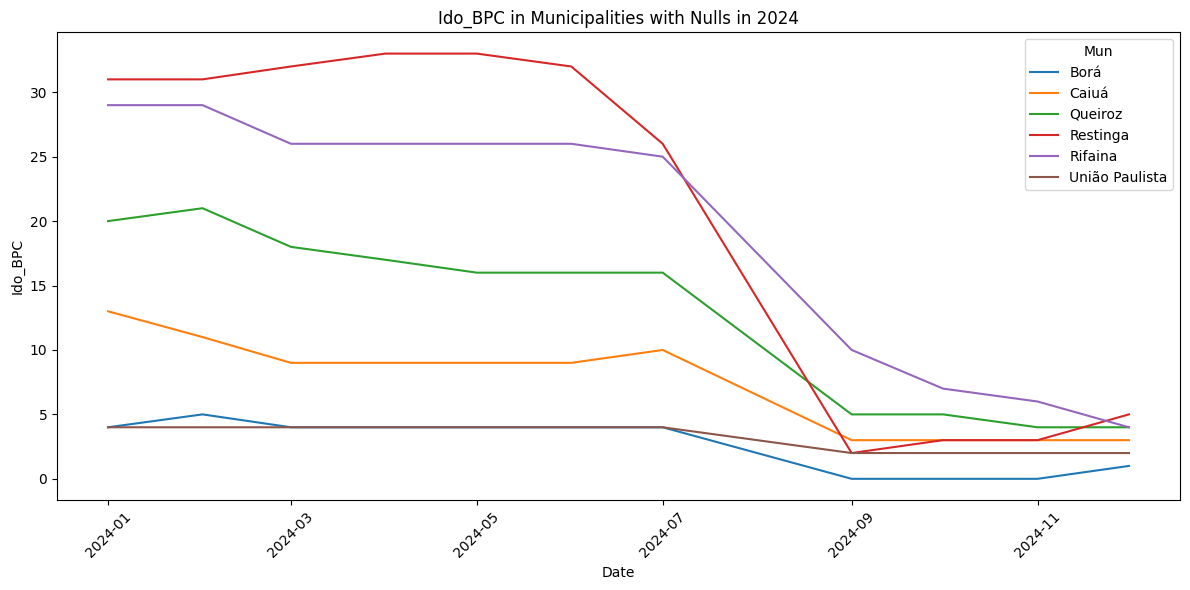

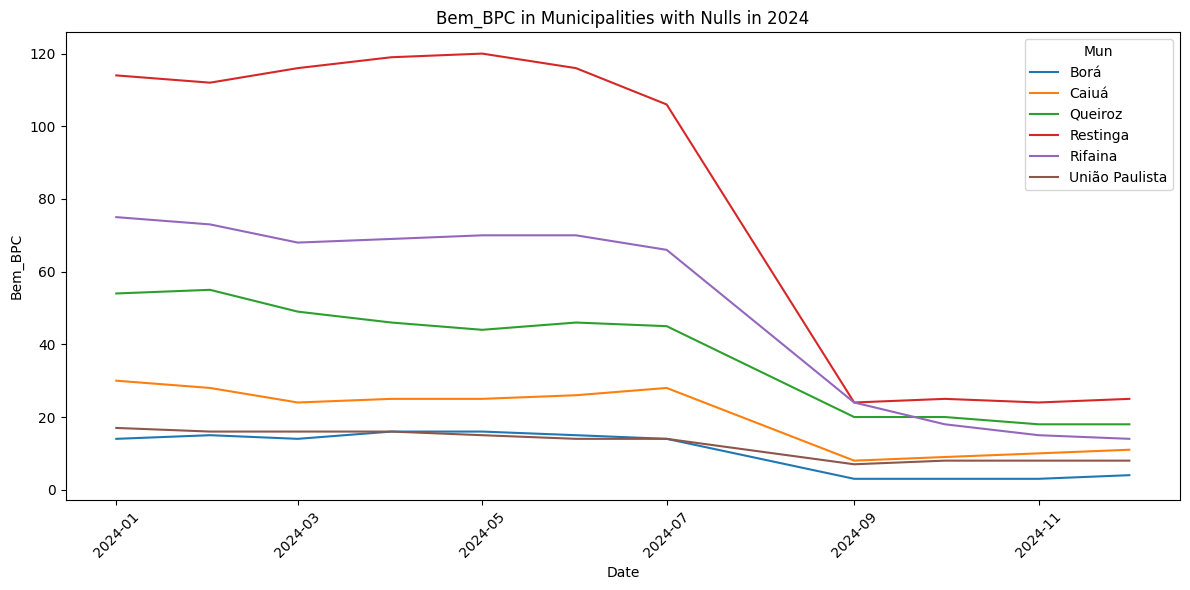

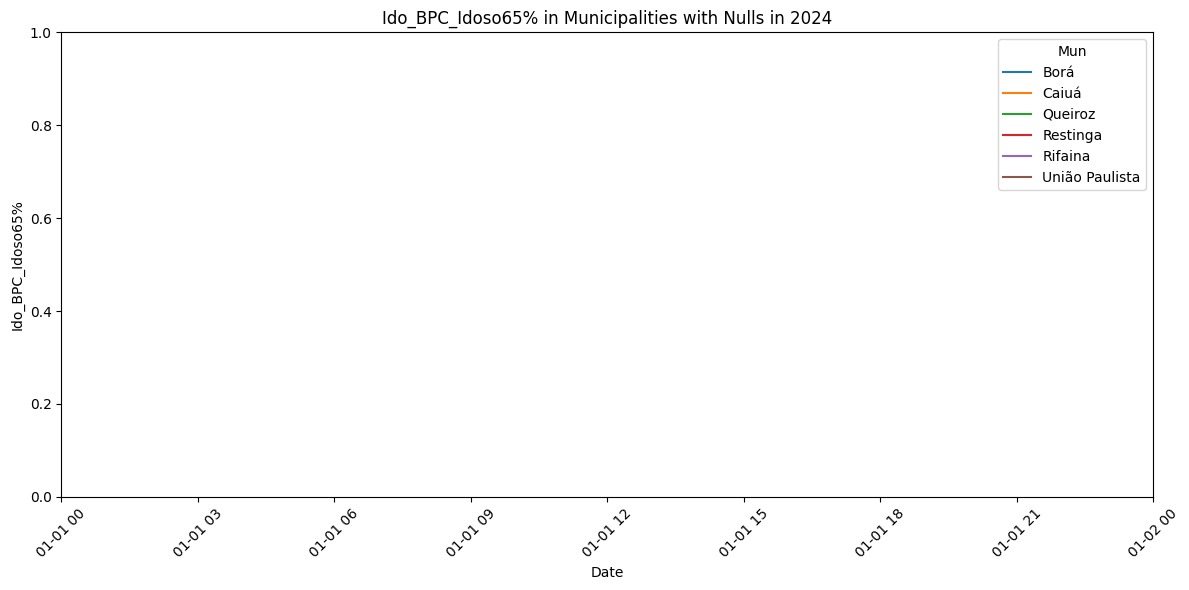

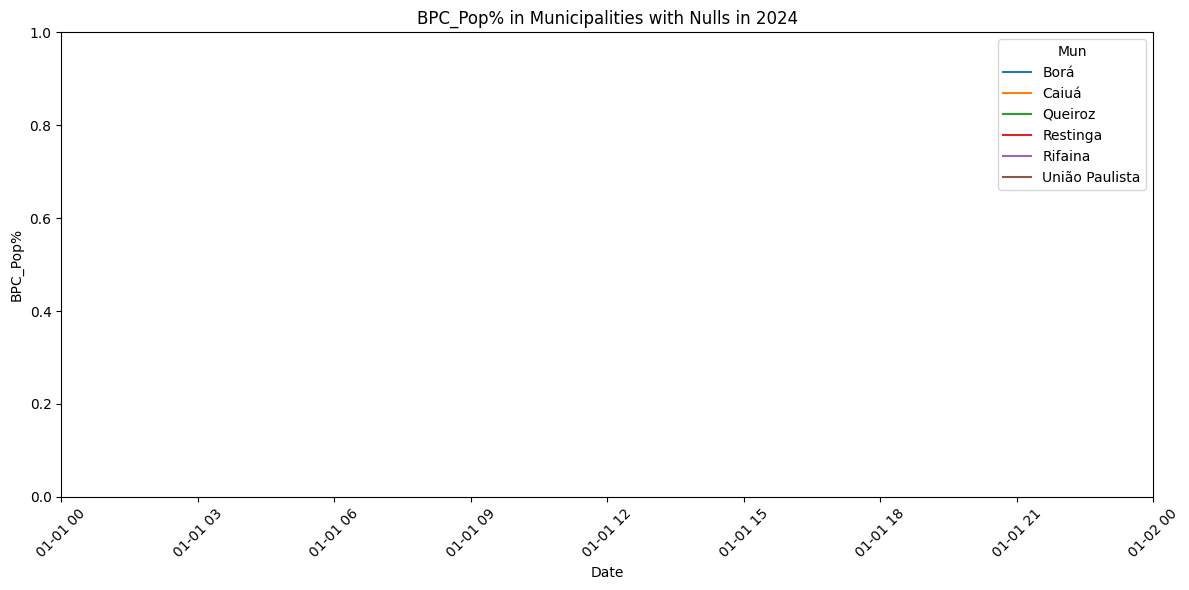

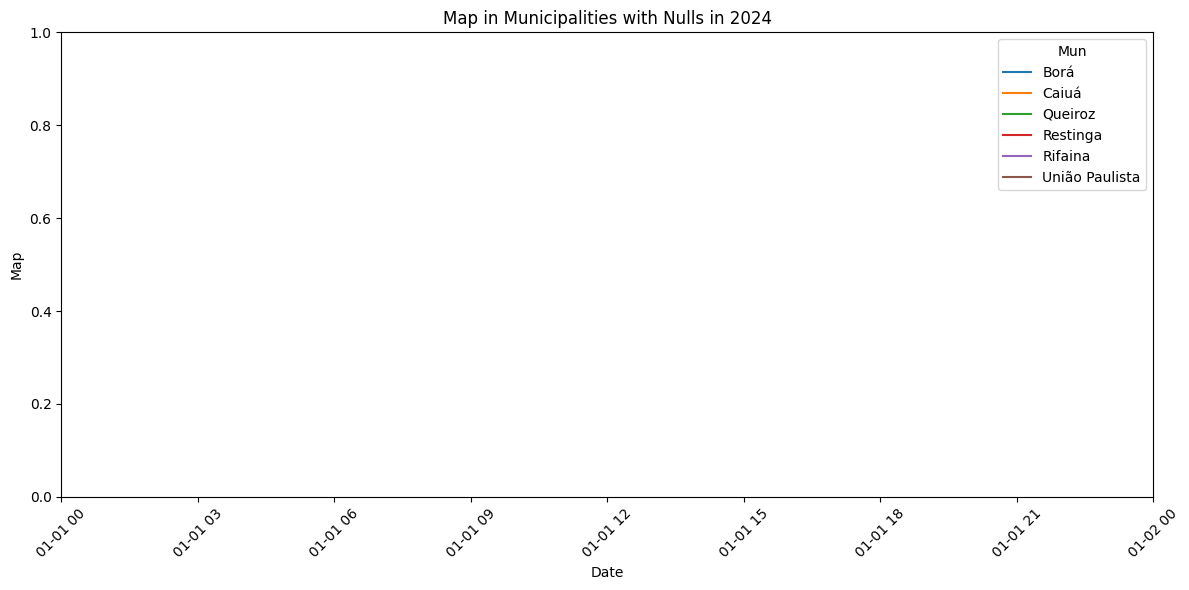

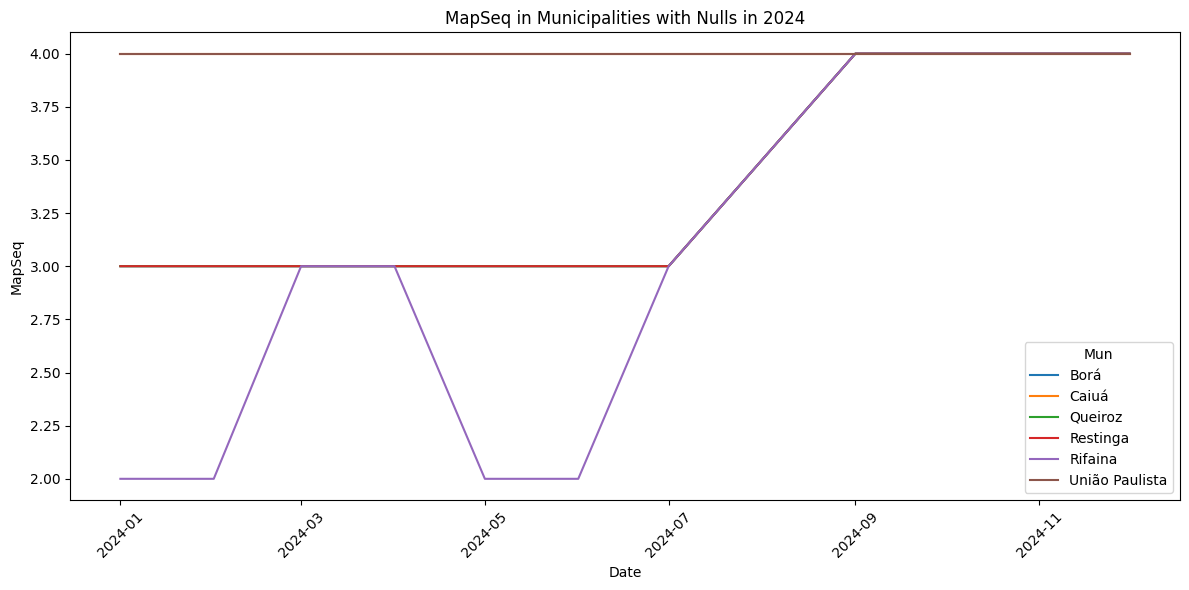

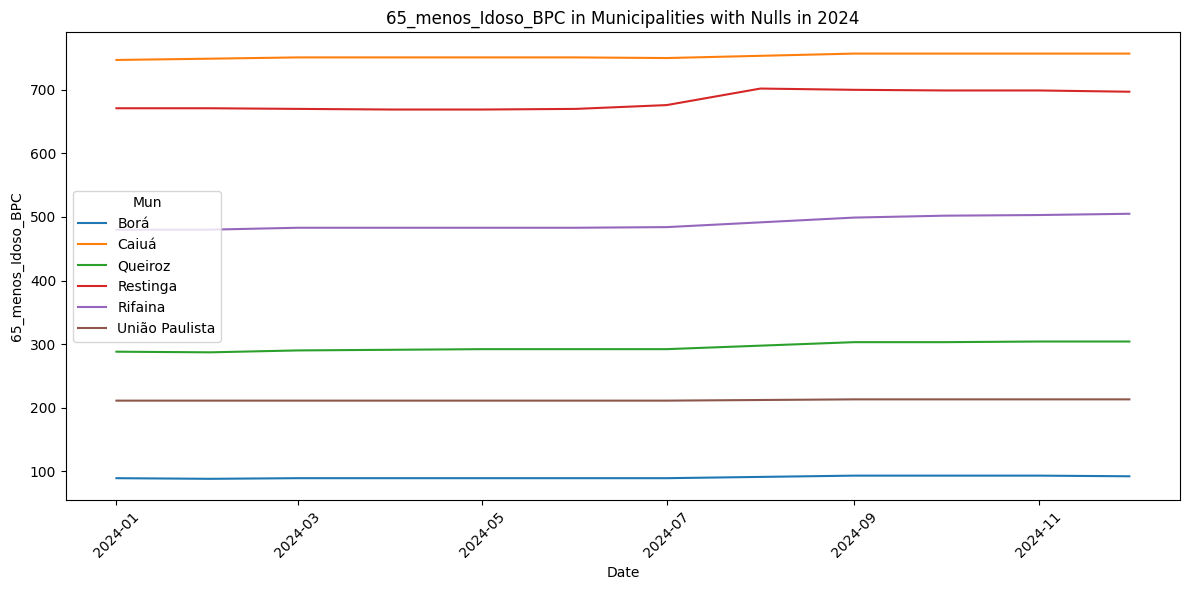

In [64]:

mun_with_nulls_2024 = df7[df7.isnull().any(axis=1) & (df7['ano'] == '24')]
mun_codes_with_nulls = mun_with_nulls_2024['Cod_Mun'].unique()


# Define the specific columns to plot
cols_to_plot = ['PCD_BPC', 'Ido_BPC', 'Bem_BPC', 'Ido_BPC_Idoso65%', 'BPC_Pop%', 'Map', 'MapSeq', '65_menos_Idoso_BPC']

# 2. Filter Data for Plotting
df7_plotting_data = df7[(df7['Cod_Mun'].isin(mun_codes_with_nulls)) & (df7['ano'] == '24')].copy()

# 3. Data Preparation for Plotting
# Ensure 'mes' is string type before mapping
df7_plotting_data['mes'] = df7_plotting_data['mes'].astype(str)
month_map = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6,
             'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}
df7_plotting_data['month_num'] = df7_plotting_data['mes'].map(month_map)
df7_plotting_data['date'] = pd.to_datetime('20' + df7_plotting_data['ano'].astype(str) + '-' + df7_plotting_data['month_num'].astype(str))

# Sort by date for correct plotting order
df7_plotting_data.sort_values(by=['Cod_Mun', 'date'], inplace=True)

# 4. Iterate and Plot through specified columns
for col in cols_to_plot:
    # Attempt to convert the column to numeric, coercing errors
    # Some columns might not be numeric, handle potential errors or skip
    try:
        df7_plotting_data[col] = pd.to_numeric(df7_plotting_data[col], errors='coerce')

        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df7_plotting_data, x='date', y=col, hue='Mun')

        # 5. Refine Plot
        plt.title(f'{col} in Municipalities with Nulls in 2024')
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # 6. Finish task (display each plot)
        plt.show()
    except Exception as e:
        print(f"Could not plot column {col} due to error: {e}")
        pass # Continue to the next column if plotting fails

Vários municípios tiveram aparentes falhas nos cadastros no mês de agosto de 2024. Como lidar? 1-> Tomar a média da RA para o periodo? 2-> Analisar os valores dos meses anteriores e seguintes dos municipios defeituosos?

In [ ]:
df7_plotting_data

,Cod_Mun,Mun,RA,Referência,PCD_BPC,Ido_BPC,Bem_BPC,Pop_65_mais,Pop_2020,Ido_BPC_Idoso65%,BPC_Pop%,Map,MapSeq,65_menos_Idoso_BPC,mes,ano,month_num,date
46521,3507209,Borá,RA de Marília,jan/24,10.0,4.0,14.0,93,810,NaN,NaN,NaN,3.0,89.0,jan,24,1,2024-01-01
47166,3507209,Borá,RA de Marília,fev/24,10.0,5.0,15.0,93,810,NaN,NaN,NaN,3.0,88.0,fev,24,2,2024-02-01
47811,3507209,Borá,RA de Marília,mar/24,10.0,4.0,14.0,93,810,NaN,NaN,NaN,3.0,89.0,mar,24,3,2024-03-01
48456,3507209,Borá,RA de Marília,abr/24,12.0,4.0,16.0,93,810,NaN,NaN,NaN,3.0,89.0,abr,24,4,2024-04-01
49101,3507209,Borá,RA de Marília,mai/24,12.0,4.0,16.0,93,810,NaN,NaN,NaN,3.0,89.0,mai,24,5,2024-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51579,3555703,União Paulista,RA de São José do Rio Preto,ago/24,NaN,NaN,NaN,215,1775,NaN,NaN,NaN,NaN,NaN,ago,24,8,2024-08-01
52224,3555703,União Paulista,RA de São José do Rio Preto,set/24,5.0,2.0,7.0,215,1775,NaN,NaN,NaN,4.0,213.0,set,24,9,2024-09-01
52869,3555703,União Paulista,RA de São José do Rio Preto,out/24,6.0,2.0,8.0,215,1775,NaN,NaN,NaN,4.0,213.0,out,24,10,2024-10-01
53514,3555703,União Paulista,RA de São José do Rio Preto,nov/24,6.0,2.0,8.0,215,1775,NaN,NaN,NaN,4.0,213.0,nov,24,11,2024-11-01


MessageError: Error: credential propagation was unsuccessful

##Cadastro Único por Unidade da Federação

In [39]:
df8.head()

,Cod,UF,Referência,CAD,PBF,Domic,CAD_Par,PBF_Par
0,11,RONDÔNIA,mai/25,357.491,133.495,555.023,"64,4","24,1"
1,12,ACRE,mai/25,207.562,132.431,260.997,"79,5","50,7"
2,13,AMAZONAS,mai/25,1.047.834,644.977,1.079.752,"97,0","59,7"
3,14,RORAIMA,mai/25,146.771,80.590,177.337,"82,8","45,4"
4,15,PARÁ,mai/25,2.256.997,1.345.437,2.442.494,"92,4","55,1"


In [40]:
df8.shape

(27, 8)

In [41]:
df8.isnull().sum()

Cod           0
UF            0
Referência    0
CAD           0
PBF           0
Domic         0
CAD_Par       0
PBF_Par       0
dtype: int64